# This notebook does EDA on the final 63342 data pts, whole Australia, 10 yrs, balanced

In [1]:
import warnings
warnings.filterwarnings('ignore')
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Data science
import pandas as pd
import numpy as np

In [2]:
# Read in data, drop useless columns, check null values
df = pd.read_csv('climate_frog1020.csv').drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'country', 'continent'],axis = 1)
print(df.shape)
df.isnull().sum()

# To make EDA easier, create new column of year & new column of month, type int
year = []
month = []
for i in df['eventDate']:
    year.append(int(str(i).split('-')[0]))
    month.append(int(str(i).split('-')[1]))
df['year'] = year
df['month'] = month

df = df.sort_values(by = 'eventDate')

(63342, 20)


In [3]:
# Check that they are the same 602 pts, 356CS, 246LF, so roughly balanced between species. Drop these rows**
df[df['ws_mean'].isnull()].groupby('year').count()

,gbifID,eventDate,stateProvince,decimalLatitude,decimalLongitude,species,coordinateUncertaintyInMeters,occurrenceStatus,key,aet_mean,...,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,month
year,,,,,,,,,,,,,,,,,,,,,
2010,3,3,3,3,3,3,3,3,3,0,...,0,0,0,0,0,0,0,0,0,3
2011,7,7,7,7,7,7,7,7,7,0,...,0,0,0,0,0,0,0,0,0,7
2012,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2013,17,17,17,17,17,17,17,17,17,0,...,0,0,0,0,0,0,0,0,0,17
2014,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2015,2,2,2,2,2,2,2,2,2,0,...,0,0,0,0,0,0,0,0,0,2
2016,3,3,3,3,3,3,3,3,3,0,...,0,0,0,0,0,0,0,0,0,3
2017,40,40,40,40,40,40,40,40,40,0,...,0,0,0,0,0,0,0,0,0,40
2018,113,113,113,113,113,113,113,113,113,0,...,0,0,0,0,0,0,0,0,0,113


In [3]:
df = df.dropna()

### Now we have our data ready. Take a look at the 11 climate variables first
### 1. Analysis with no time scale (i.e., all 10 years)

In [50]:
# First get the 11 vars into a new df
columns = ['aet_mean', 'def_mean', 'pet_mean','ppt_mean', 'q_mean', 'srad_mean', 'tmax_mean', 'tmin_mean', 'vap_mean','vpd_mean', 'ws_mean']
df2 = pd.DataFrame()
for i in columns:
    df2[i] = df[i]
df2.describe()

,aet_mean,def_mean,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
count,62740.000000,62740.000000,62740.000000,62740.000000,62740.000000,62740.000000,62740.000000,62740.000000,62740.000000,62740.000000,62740.000000
mean,61.517957,52.546387,114.016178,69.501702,8.330535,202.216373,22.696474,11.781826,1.347588,0.765006,3.855993
std,17.734589,19.613471,10.242304,28.741601,19.489768,13.858735,2.413464,2.698703,0.252464,0.136329,0.773252
min,10.583333,2.750000,64.583333,11.083333,0.500000,153.416667,9.116668,0.841667,0.615000,0.274167,2.258333
25%,47.750000,37.916667,108.805556,53.000000,2.833333,190.750000,21.298612,10.133334,1.145833,0.688333,3.266667
50%,62.000000,48.416667,112.229167,66.000000,3.750000,205.500000,23.166669,12.605557,1.397500,0.746667,3.858333
75%,75.527778,65.250000,119.833333,80.750000,5.444444,211.666667,24.075002,13.133336,1.463333,0.813333,4.200000
max,125.583333,139.750000,159.666667,401.083333,318.250000,243.000000,31.591668,21.350002,2.400000,1.848333,9.716667


[Text(1, 0, 'aet_mean'),
 Text(2, 0, 'def_mean'),
 Text(3, 0, 'pet_mean'),
 Text(4, 0, 'ppt_mean'),
 Text(5, 0, 'q_mean'),
 Text(6, 0, 'srad_mean'),
 Text(7, 0, 'tmax_mean'),
 Text(8, 0, 'tmin_mean'),
 Text(9, 0, 'vap_mean'),
 Text(10, 0, 'vpd_mean'),
 Text(11, 0, 'ws_mean')]

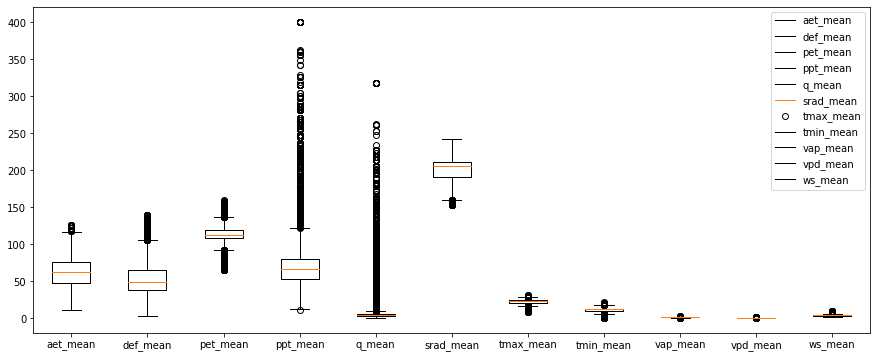

In [57]:
# draw box plot
fig, ax = plt.subplots(figsize=(15,6))
ax.boxplot(df2)
ax.set_xticklabels(columns)
plt.legend(columns)

**We can see from the  BOXPLOT  that ppt_mean and q_mean are *super skewed*.  Which year caused this?**

**What do they stand for again? ppt_mean is Accumulated Precipitation, and q_mean is runoff.**

In [60]:
df2.describe()[['ppt_mean','q_mean']]

,ppt_mean,q_mean
count,62740.000000,62740.000000
mean,69.501702,8.330535
std,28.741601,19.489768
min,11.083333,0.500000
25%,53.000000,2.833333
50%,66.000000,3.750000
75%,80.750000,5.444444
max,401.083333,318.250000


In [73]:
# Which years have ppt_mean / q_mean above its 75% percentile? 
print('ppt_mean large outliers: ')
print(df[df['ppt_mean']>=80.75]['year'].value_counts())
print('q_mean large outliers: ')
print(df[df['q_mean']>=5.444444]['year'].value_counts())

ppt_mean large outliers: 
2010    5331
2018    3953
2020    2437
2011    1468
2019    1382
2017    1305
2015     984
2016     907
2013     524
2014     510
2012     278
Name: year, dtype: int64
q_mean large outliers: 
2020    5723
2010    5368
2019    2902
2011    1643
2018    1591
2017    1140
2015    1039
2016     992
2013     589
2014     461
2012     335
Name: year, dtype: int64


### ❓One step further: what CAUSED this skewness?
### 2010 ranked #1, and #2 on contributing to outliers in these two vars. 2011 ranked #4 and #4. Should we drop them? 

### 2. Analysis over time, by year and by month, for each variable
#### Let's first do by year

<function matplotlib.pyplot.show(close=None, block=None)>

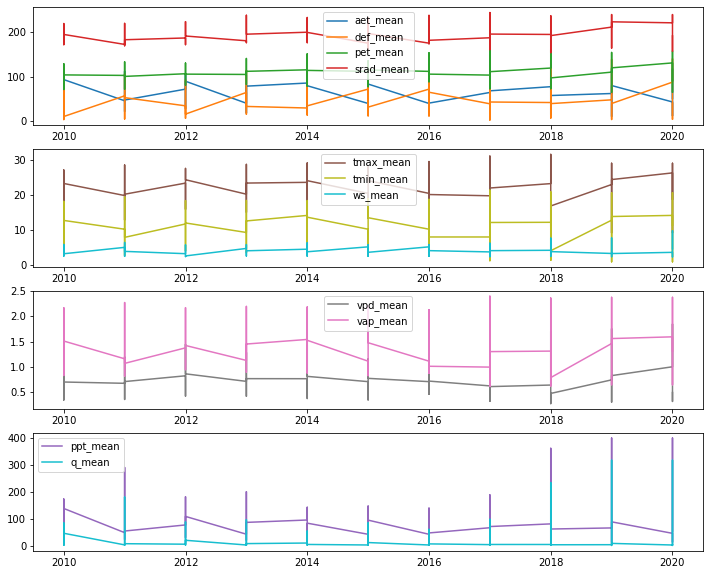

In [125]:
# Group the 11 vars into 4 groups, depending on their values & whether they are outliers
large = ['aet_mean','def_mean','pet_mean','srad_mean']
small = ['tmax_mean','tmin_mean','ws_mean']
supersmall = ['vpd_mean','vap_mean']
outliers = ['ppt_mean','q_mean']

# This title is not showing for some reason
fig.suptitle('trend of 11 vars over 10 years',fontsize = 12)

fig, ax = plt.subplots(ncols = 1, nrows = 4, figsize=(12,10))
colors1 = ['tab:blue','tab:orange','tab:green','tab:red']
colors2 = ['tab:brown','tab:olive','tab:cyan',]
colors3 = ['tab:grey','tab:pink']
colors4 = ['tab:purple','tab:cyan']

for i in range(4):
    plot1 = ax[0].plot(df['year'],df[large[i]], color=colors1[i])
ax[0].legend(large)

for i in range(3):
    plot2 = ax[1].plot(df['year'],df[small[i]], color=colors2[i])
ax[1].legend(small)

for i in range(2):
    plot3 = ax[2].plot(df['year'],df[supersmall[i]], color=colors3[i])
ax[2].legend(supersmall)

for i in range(2):
    plot4 = ax[3].plot(df['year'],df[outliers[i]], color=colors4[i])
ax[3].legend(outliers)
plt.show

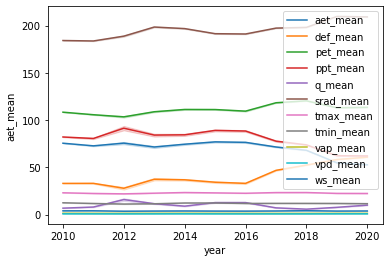

In [126]:
# Here's a more readable lineplot
plt.figsize = (8,14)
fig.suptitle('trend of 11 vars over 10 years')
for column in columns:
    plt1= sns.lineplot(x = df['year'], y = df[column])
plt.legend(columns)

**From the PSEUDOLINEPLOT, we can see that after grouping,**

**srad, tmax, tmin, and vap (and maybe slightly ppt) seem to be changing together;**

**aet seem to be going opposite with def**

### ❓What else?


#### Now let's see by month

In [131]:
df.groupby('month').count()

,gbifID,eventDate,stateProvince,decimalLatitude,decimalLongitude,species,coordinateUncertaintyInMeters,occurrenceStatus,key,aet_mean,...,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,year
month,,,,,,,,,,,,,,,,,,,,,
1,3338,3338,3338,3338,3338,3338,3338,3338,3338,3338,...,3338,3338,3338,3338,3338,3338,3338,3338,3338,3338
2,4881,4881,4881,4881,4881,4881,4881,4881,4881,4881,...,4881,4881,4881,4881,4881,4881,4881,4881,4881,4881
3,2231,2231,2231,2231,2231,2231,2231,2231,2231,2231,...,2231,2231,2231,2231,2231,2231,2231,2231,2231,2231
4,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,...,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814
5,1969,1969,1969,1969,1969,1969,1969,1969,1969,1969,...,1969,1969,1969,1969,1969,1969,1969,1969,1969,1969
6,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721,...,2721,2721,2721,2721,2721,2721,2721,2721,2721,2721
7,3404,3404,3404,3404,3404,3404,3404,3404,3404,3404,...,3404,3404,3404,3404,3404,3404,3404,3404,3404,3404
8,4493,4493,4493,4493,4493,4493,4493,4493,4493,4493,...,4493,4493,4493,4493,4493,4493,4493,4493,4493,4493
9,8274,8274,8274,8274,8274,8274,8274,8274,8274,8274,...,8274,8274,8274,8274,8274,8274,8274,8274,8274,8274


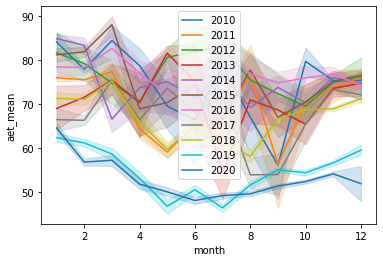

In [6]:
for year in df['year'].unique():
    sns.lineplot(x = df[df['year']==year]['month'], y = df['aet_mean'])
plt.legend(df['year'].unique())

### 3. Okay, now we see the trend&distribution of the climate vars. But do they correlate with occurrence? 
### We'll use two ways to see correlation: pearson, which tests if a linear decision boundary exists, and scatterplots, which will test if polynomial/ curvery boundary exist

In [137]:
# Get a new df to use
df3 = df.drop(['key','gbifID', 'eventDate', 'species', 'coordinateUncertaintyInMeters'],axis = 1)
df3.columns

Index(['stateProvince', 'decimalLatitude', 'decimalLongitude',
       'occurrenceStatus', 'aet_mean', 'def_mean', 'pet_mean', 'ppt_mean',
       'q_mean', 'srad_mean', 'tmax_mean', 'tmin_mean', 'vap_mean', 'vpd_mean',
       'ws_mean', 'year', 'month'],
      dtype='object')

In [138]:
df3.corr('pearson')

,decimalLatitude,decimalLongitude,occurrenceStatus,aet_mean,def_mean,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,year,month
decimalLatitude,1.000000,0.395701,0.464574,0.378054,0.000454,0.655470,0.507956,0.482250,0.676998,0.771475,0.694363,0.769587,0.402280,-0.302315,0.064718,-0.096501
decimalLongitude,0.395701,1.000000,0.458609,0.433478,-0.308052,0.159825,0.120068,-0.227022,0.286073,0.532071,0.469256,0.517026,0.077062,-0.509007,-0.106868,0.030063
occurrenceStatus,0.464574,0.458609,1.000000,0.428367,-0.225349,0.308719,0.309903,0.092232,0.130287,0.553348,0.565376,0.570596,0.184975,-0.160678,-0.293254,0.089923
aet_mean,0.378054,0.433478,0.428367,1.000000,-0.854455,0.094750,0.822991,0.332358,-0.171070,0.399469,0.573881,0.603115,-0.314784,0.096300,-0.430224,0.048441
def_mean,0.000454,-0.308052,-0.225349,-0.854455,1.000000,0.436190,-0.669542,-0.216386,0.434097,0.056082,-0.191127,-0.284869,0.613454,-0.139909,0.489857,-0.052236
pet_mean,0.655470,0.159825,0.308719,0.094750,0.436190,1.000000,0.142984,0.161720,0.536644,0.798807,0.627654,0.498553,0.629086,-0.101092,0.196754,-0.016775
ppt_mean,0.507956,0.120068,0.309903,0.822991,-0.669542,0.142984,1.000000,0.802824,-0.027141,0.336004,0.510045,0.589377,-0.213425,0.193080,-0.257240,-0.044682
q_mean,0.482250,-0.227022,0.092232,0.332358,-0.216386,0.161720,0.802824,1.000000,0.150803,0.173013,0.274394,0.376419,-0.021544,0.202382,0.019712,-0.127207
srad_mean,0.676998,0.286073,0.130287,-0.171070,0.434097,0.536644,-0.027141,0.150803,1.000000,0.493026,0.376716,0.434216,0.505411,-0.486882,0.588211,-0.151551
tmax_mean,0.771475,0.532071,0.553348,0.399469,0.056082,0.798807,0.336004,0.173013,0.493026,1.000000,0.870946,0.819941,0.575441,-0.362783,-0.068637,-0.028489


### Alright, will dropping data from 2010 and 2011 increase their correlation?

In [143]:
# ❗❗❗If we drop the first two years, we need to rebalance!
df_8yr = df[df['year']>2011]
df_8yr.groupby('species').count()

,gbifID,eventDate,stateProvince,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,occurrenceStatus,key,aet_mean,def_mean,...,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,year,month
species,,,,,,,,,,,,,,,,,,,,,
Crinia Signifera,30452,30452,30452,30452,30452,30452,30452,30452,30452,30452,...,30452,30452,30452,30452,30452,30452,30452,30452,30452,30452
Litoria Fallax,24911,24911,24911,24911,24911,24911,24911,24911,24911,24911,...,24911,24911,24911,24911,24911,24911,24911,24911,24911,24911


In [146]:
# Let's see pearson's correlation first
df_8yr.drop(['gbifID','coordinateUncertaintyInMeters'],axis = 1).corr('pearson')

,decimalLatitude,decimalLongitude,occurrenceStatus,key,aet_mean,def_mean,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean,year,month
decimalLatitude,1.000000,0.398981,0.509802,0.369538,0.409561,-0.021120,0.662688,0.523853,0.482054,0.737303,0.778734,0.706057,0.783005,0.403944,-0.296335,0.014604,-0.102420
decimalLongitude,0.398981,1.000000,0.445081,0.377515,0.418839,-0.295518,0.175479,0.095901,-0.236189,0.378659,0.528042,0.463710,0.510611,0.065462,-0.519457,-0.089875,0.011283
occurrenceStatus,0.509802,0.445081,1.000000,0.854244,0.379018,-0.141465,0.390078,0.286320,0.112786,0.323455,0.562777,0.565947,0.567586,0.175801,-0.184914,-0.104002,0.049167
key,0.369538,0.377515,0.854244,1.000000,0.355508,-0.167960,0.301280,0.247468,0.067480,0.186788,0.453300,0.451037,0.439677,0.116254,-0.146799,-0.200810,0.038305
aet_mean,0.409561,0.418839,0.379018,0.355508,1.000000,-0.843053,0.168436,0.820828,0.350775,-0.048679,0.407100,0.578660,0.600737,-0.338076,0.091692,-0.406250,0.020654
def_mean,-0.021120,-0.295518,-0.141465,-0.167960,-0.843053,1.000000,0.388109,-0.663630,-0.236458,0.318826,0.069572,-0.181616,-0.270829,0.666318,-0.135395,0.381865,-0.022115
pet_mean,0.662688,0.175479,0.390078,0.301280,0.168436,0.388109,1.000000,0.190403,0.167865,0.500548,0.825071,0.658922,0.533022,0.641960,-0.090792,0.004033,-0.005144
ppt_mean,0.523853,0.095901,0.286320,0.247468,0.820828,-0.663630,0.190403,1.000000,0.816207,0.051069,0.339254,0.510317,0.585432,-0.218081,0.194839,-0.252337,-0.065052
q_mean,0.482054,-0.236189,0.112786,0.067480,0.350775,-0.236458,0.167865,0.816207,1.000000,0.155914,0.179518,0.281981,0.383721,-0.014875,0.208594,-0.001197,-0.131510
srad_mean,0.737303,0.378659,0.323455,0.186788,-0.048679,0.318826,0.500548,0.051069,0.155914,1.000000,0.580354,0.471981,0.552181,0.584643,-0.530105,0.398590,-0.128856


In [150]:
# 💡 There's more to the corr table (year, location, etc)!
# But for now, let's just compare all other vars' correlation with occurrence
corr_df = pd.DataFrame()
corr_df['10years_corr_with_occurrence'] = df3.corr('pearson')['occurrenceStatus']
corr_df['8years_corr_with_occurrence'] = df_8yr.drop(['gbifID','coordinateUncertaintyInMeters'],axis = 1).corr('pearson')['occurrenceStatus']
corr_df

,10years_corr_with_occurrence,8years_corr_with_occurrence
decimalLatitude,0.464574,0.509802
decimalLongitude,0.458609,0.445081
occurrenceStatus,1.000000,1.000000
aet_mean,0.428367,0.379018
def_mean,-0.225349,-0.141465
pet_mean,0.308719,0.390078
ppt_mean,0.309903,0.286320
q_mean,0.092232,0.112786
srad_mean,0.130287,0.323455
tmax_mean,0.553348,0.562777


**We can see from above: after dropping 2 yrs,**

- corr(year) decreases, which is good; corr(decimalLatitude) increases, also good, and is greater than the decrement in corr(decimalLongitude)
- among the 11 vars, 5 decreased and 6 increased. (Of the two furthest outliers, ppt decreased, q increased)